In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка и очистка данных

In [119]:
files = [f'IT Salary Survey EU {year}.csv' for year in range(2018, 2021)]

df = pd.DataFrame()
for file_name in files:
    curr_df = pd.read_csv(file_name)
    print(f'File_name: {file_name}\nColumns count: {curr_df.shape[1]}\nRows count: {curr_df.shape[0]}')
    print('*' * 40)
    df = pd.concat([df, curr_df])

print(f'Result DataFrame\nColumns count: {df.shape[1]}\nRows count: {df.shape[0]}')

File_name: IT Salary Survey EU 2018.csv
Columns count: 14
Rows count: 765
****************************************
File_name: IT Salary Survey EU 2019.csv
Columns count: 23
Rows count: 991
****************************************
File_name: IT Salary Survey EU 2020.csv
Columns count: 23
Rows count: 1253
****************************************
Result DataFrame
Columns count: 42
Rows count: 3009


In [120]:
df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,...,Years of experience in Germany,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Employment status,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# Пропуски в колонках
null_cols_stats = (df.isna().sum(axis=0) * 100 / df.shape[0]).sort_values(ascending=False)
null_cols_stats

0                                                                                                                          100.000000
Yearly stocks one year ago. Only answer if staying in same country                                                          95.380525
Yearly stocks                                                                                                               93.253573
Company name                                                                                                                91.458956
Yearly bonus one year ago. Only answer if staying in same country                                                           91.458956
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                           87.603855
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR     84.646062
Salary two years ago                                          

In [122]:
# Так как есть колонки, в которых очень много, то удалим их
treshold_for_delete = 80
cols_for_delete = np.array(null_cols_stats[null_cols_stats > treshold_for_delete].index)

print(f'Удаляем {cols_for_delete.shape[0]} колонок из {df.shape[1]}...')
clean_df = df.drop(columns=cols_for_delete)

Удаляем 10 колонок из 42...


# Разведывательный анализ данных (EDA)

In [123]:
clean_df.describe()

,Age,Years of experience,Current Salary,Yearly brutto salary (without bonus and stocks),Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Number of home office days per month,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country
count,2780.000000,1723.000000,750.000000,990.000000,603.000000,639.000000,1.253000e+03,8.850000e+02
mean,32.401079,8.537725,68381.765333,72562.212121,65803.895522,6.462050,8.027904e+07,6.322459e+05
std,5.406931,4.906948,21196.306557,23947.379182,20554.017614,15.384601,2.825061e+09,1.680508e+07
min,20.000000,0.000000,10300.000000,6000.000000,0.000000,0.000000,1.000100e+04,1.100000e+04
25%,29.000000,5.000000,57000.000000,60000.000000,55000.000000,2.000000,5.880000e+04,5.500000e+04
50%,32.000000,8.000000,65000.000000,70000.000000,65000.000000,4.000000,7.000000e+04,6.500000e+04
75%,35.000000,11.000000,75000.000000,80000.000000,75000.000000,7.000000,8.000000e+04,7.500000e+04
max,69.000000,38.000000,200000.000000,216000.000000,200000.000000,365.000000,1.000000e+11,5.000000e+08


In [104]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 1252
Data columns (total 32 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Timestamp                                                                                                 2018 non-null   object 
 1   Age                                                                                                       2780 non-null   float64
 2   Gender                                                                                                    2985 non-null   object 
 3   City                                                                                                      2980 non-null   object 
 4   Position                                                                      

In [124]:
continues_columns = []
categorical_columns = []
for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        categorical_columns.append(col)
    elif clean_df[col].dtype in ('float64', 'int64'):
        continues_columns.append(col)

print(f'Непрерывные переменные\nКоличество: {len(continues_columns)}\nНазвания переменных: {continues_columns}')
print('*' * 90)
print(f'Категориальные переменные\nКоличество: {len(categorical_columns)}\nНазвания переменных: {categorical_columns}')

Непрерывные переменные
Количество: 8
Названия переменных: ['Age', 'Years of experience', 'Current Salary', 'Yearly brutto salary (without bonus and stocks)', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'Number of home office days per month', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country']
******************************************************************************************
Категориальные переменные
Количество: 24
Названия переменных: ['Timestamp', 'Gender', 'City', 'Position', 'Your level', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type', 'Zeitstempel', 'Seniority level', 'Position (without seniority)', 'Your main technology / programming language', 'Number of vacation days', 'Сontract duration', 'Company business sector', 'Position ', 'Total years of experienc

Проверим все ли категориальные переменные являются категориальными

In [125]:
clean_df[categorical_columns].nunique()


Timestamp                                                                   2009
Gender                                                                         5
City                                                                         183
Position                                                                     397
Your level                                                                     3
Are you getting any Stock Options?                                             2
Main language at work                                                         21
Company size                                                                   8
Company type                                                                 101
Zeitstempel                                                                  991
Seniority level                                                               24
Position (without seniority)                                                  51
Your main technology / progr

In [126]:
false_cat_features = [
    'Years of experience in Germany', 
    'Total years of experience', 
    'Yearly bonus + stocks in EUR', 
    'Annual bonus+stocks one year ago. Only answer if staying in same country'
]

for cat in false_cat_features:
    clean_df[cat] = clean_df[cat].str.replace(',', '.').str.extract(r'(\d+)').astype('float64')



In [127]:
continues_columns = []
categorical_columns = []
for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        categorical_columns.append(col)
    elif clean_df[col].dtype in ('float64', 'int64'):
        continues_columns.append(col)

print(f'Непрерывные переменные\nКоличество: {len(continues_columns)}\nНазвания переменных: {continues_columns}')
print('*' * 90)
print(f'Категориальные переменные\nКоличество: {len(categorical_columns)}\nНазвания переменных: {categorical_columns}')

Непрерывные переменные
Количество: 12
Названия переменных: ['Age', 'Years of experience', 'Current Salary', 'Yearly brutto salary (without bonus and stocks)', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'Number of home office days per month', 'Total years of experience', 'Years of experience in Germany', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'Annual bonus+stocks one year ago. Only answer if staying in same country']
******************************************************************************************
Категориальные переменные
Количество: 20
Названия переменных: ['Timestamp', 'Gender', 'City', 'Position', 'Your level', 'Are you getting any Stock Options?', 'Main language at work', 'Company size', 'Company type', 'Zeitstempel', 'Seniority level', 'Position (without s

## Обрабатывает непрерывные переменные

In [128]:
clean_df[continues_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2780.0,3.240108e+01,5.406931e+00,20.0,29.0,32.0,35.0,6.900000e+01
Years of experience,1723.0,8.537725e+00,4.906948e+00,0.0,5.0,8.0,11.0,3.800000e+01
Current Salary,750.0,6.838177e+04,2.119631e+04,10300.0,57000.0,65000.0,75000.0,2.000000e+05
Yearly brutto salary (without bonus and stocks),990.0,7.256221e+04,2.394738e+04,6000.0,60000.0,70000.0,80000.0,2.160000e+05
Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,603.0,6.580390e+04,2.055402e+04,0.0,55000.0,65000.0,75000.0,2.000000e+05
Number of home office days per month,639.0,6.462050e+00,1.538460e+01,0.0,2.0,4.0,7.0,3.650000e+02
Total years of experience,1236.0,9.048544e+00,1.188566e+01,0.0,5.0,8.0,12.0,3.830000e+02
Years of experience in Germany,1218.0,3.692118e+00,3.654282e+00,0.0,1.0,3.0,5.0,3.000000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Yearly bonus + stocks in EUR,824.0,6.089490e+06,1.741825e+08,0.0,0.0,5000.0,20000.0,5.000000e+09


Вывод:

Есть колонки Yearly brutto salary, которые про одно и тоже

Объединим колонки в одну

In [129]:
yearly_cols = [
    'Yearly brutto salary (without bonus and stocks)',
    'Yearly brutto salary (without bonus and stocks) in EUR',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
    'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
    'Yearly bonus + stocks in EUR',
    'Annual bonus+stocks one year ago. Only answer if staying in same country',
]

clean_df['Yearly salary'] = clean_df[yearly_cols].max(axis=1)

continues_columns.append('Yearly salary')

for elem in yearly_cols:
    try:
        continues_columns.remove(elem)
    except:
        print(elem)

clean_df.drop(columns=yearly_cols, inplace=True)

In [130]:
experience_columns = [
    'Years of experience',
    'Total years of experience',
    'Years of experience in Germany'
]

clean_df['Years of experience total'] = clean_df[experience_columns].max(axis=1)

continues_columns.append('Years of experience total')

for elem in experience_columns:
    continues_columns.remove(elem)

clean_df.drop(columns=experience_columns, inplace=True)

In [131]:
clean_df[continues_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2780.0,3.240108e+01,5.406931e+00,20.0,29.0,32.0,35.0,6.900000e+01
Current Salary,750.0,6.838177e+04,2.119631e+04,10300.0,57000.0,65000.0,75000.0,2.000000e+05
Number of home office days per month,639.0,6.462050e+00,1.538460e+01,0.0,2.0,4.0,7.0,3.650000e+02
Yearly salary,2243.0,4.688578e+07,2.114061e+09,6000.0,60000.0,70000.0,80000.0,1.000000e+11
Years of experience total,2969.0,8.763388e+00,8.545631e+00,0.0,5.0,8.0,11.0,3.830000e+02


По максимальным значениям видны выбросы, поэтому проведем отчистку от них

In [132]:
clean_df = clean_df[
(
    clean_df['Yearly salary'] < clean_df['Yearly salary'].quantile(0.9)
)
]

clean_df[continues_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1907.0,32.218144,5.422798,20.0,28.0,32.0,35.0,69.0
Current Salary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of home office days per month,582.0,6.285653,15.972630,0.0,2.0,4.0,6.0,365.0
Yearly salary,2007.0,66336.942202,15563.996463,6000.0,57755.0,67000.0,76250.0,99000.0
Years of experience total,2002.0,8.452048,9.762494,0.0,5.0,8.0,11.0,383.0


In [143]:
# Удаляем выброс в этой колонке

clean_df = clean_df[clean_df['Years of experience total'] < clean_df['Years of experience total'].quantile(0.9)]

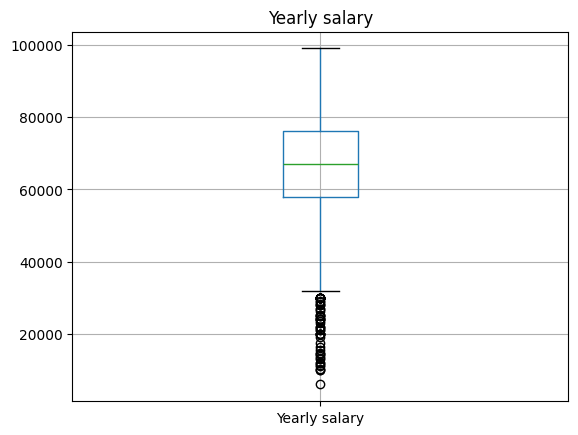

In [133]:
def plot_boxplot(col_name):
    plt.title(col_name)
    clean_df.boxplot(col_name)
    plt.show()


plot_boxplot('Yearly salary')

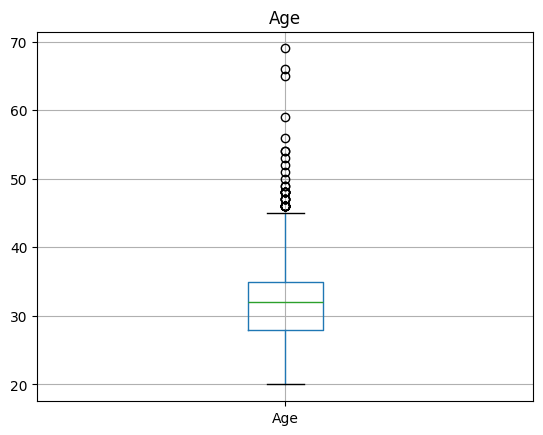

In [134]:
plot_boxplot('Age')

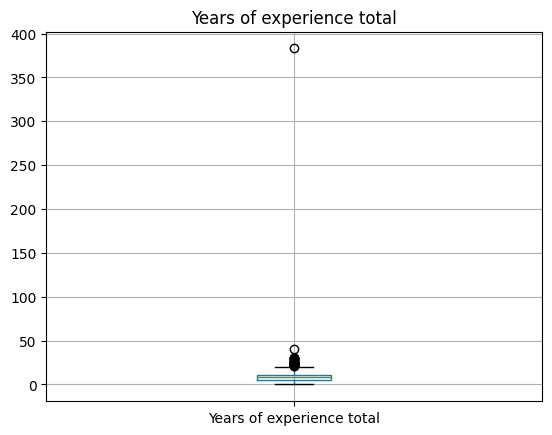

In [135]:
plot_boxplot('Years of experience total')

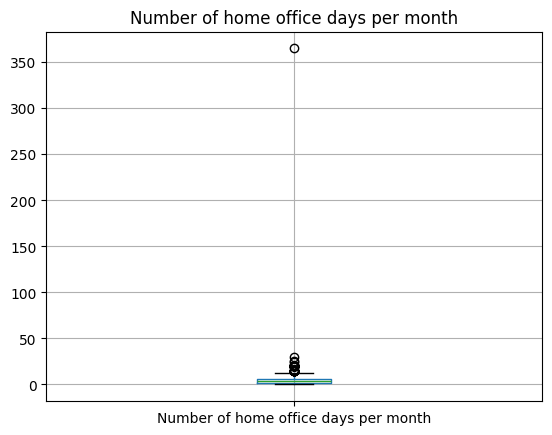

In [136]:
plot_boxplot('Number of home office days per month')

In [137]:
continues_columns.remove('Current Salary')

Посмотрим как скоррелированы эти переменные

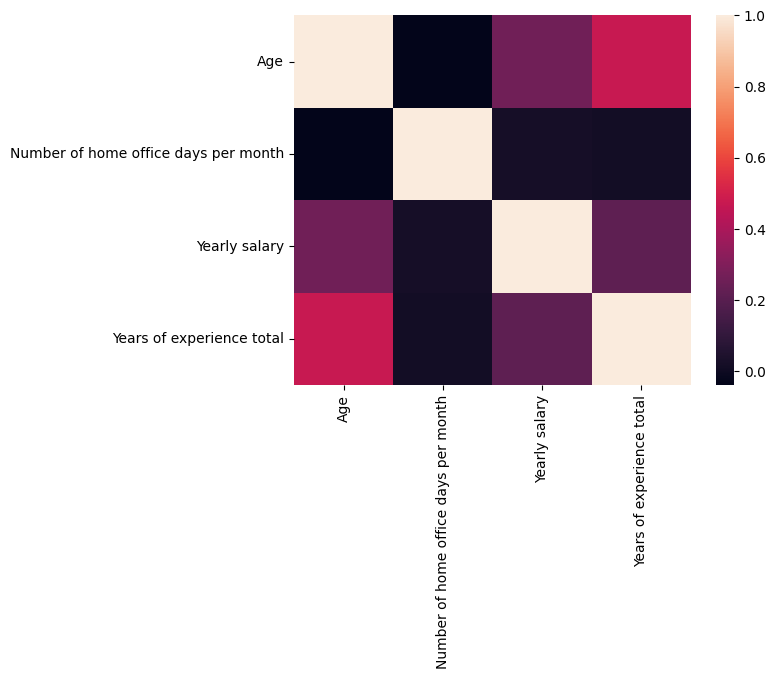

In [138]:
sns.heatmap(clean_df[continues_columns].corr())
plt.show()

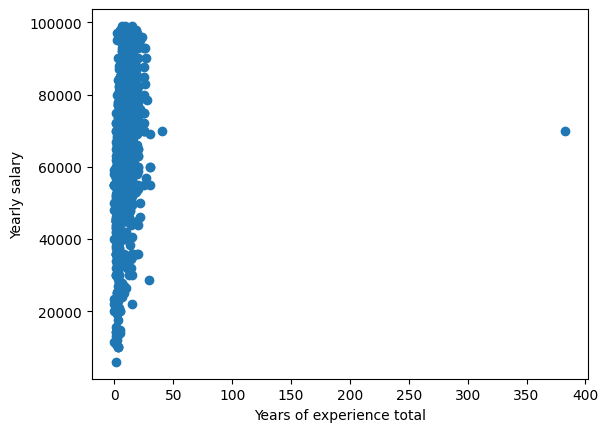

In [139]:
X = 'Years of experience total'
Y = 'Yearly salary'

plt.scatter(clean_df[X], clean_df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

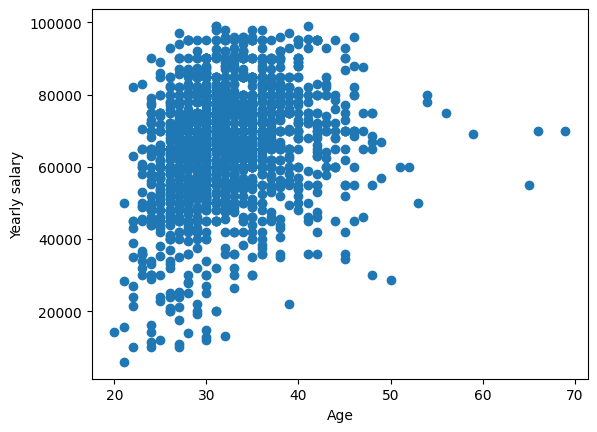

In [140]:
X = 'Age'
Y = 'Yearly salary'

plt.scatter(clean_df[X], clean_df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

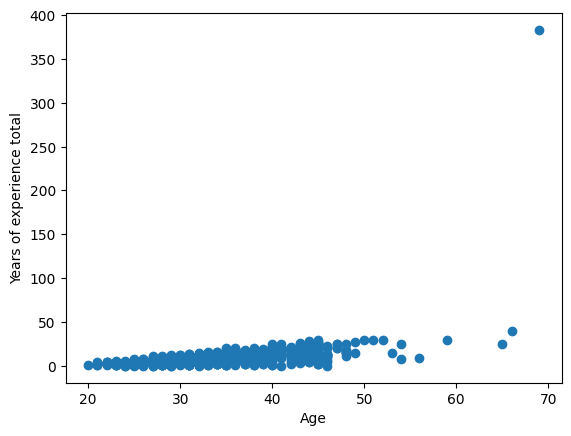

In [142]:
X = 'Age'
Y = 'Years of experience total'

plt.scatter(clean_df[X], clean_df[Y])
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

Построим линейную регрессию между признаками с лучшей корреляцией

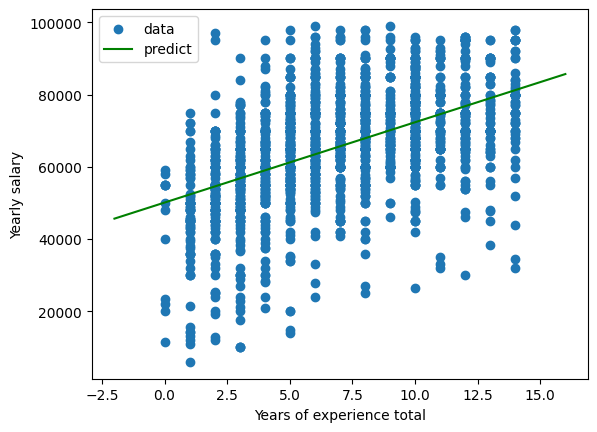

In [144]:
from sklearn.linear_model import LinearRegression

X = 'Years of experience total'
Y = 'Yearly salary'
data = clean_df[[X, Y]].dropna()
model = LinearRegression()
model.fit(data[X].values.reshape(-1,1), data[Y].values.reshape(-1,1))

x_pred = np.linspace(data[X].min() - 2, data[X].max() + 2, 50)
y_pred = model.predict(x_pred.reshape(-1, 1))

plt.scatter(clean_df[X], clean_df[Y], label='data')
plt.plot(x_pred, y_pred, c='g', label='predict')
plt.xlabel(X)
plt.ylabel(Y)
plt.legend()
plt.show()

## Категориальные переменные

In [148]:
clean_df[categorical_columns].describe().T

,count,unique,top,freq
Timestamp,986,983,25/11/2020 18:28:01,2
Gender,1752,2,Male,1431
City,1756,130,Berlin,889
Position,0,0,NaN,NaN
Your level,0,0,NaN,NaN
Are you getting any Stock Options?,0,0,NaN,NaN
Main language at work,1746,17,English,1407
Company size,1731,8,1000+,574
Company type,1718,50,Product,1070
Zeitstempel,770,770,02.12.2019 11:18:26,1


In [149]:
relevant_categorical_columns = [
    'Gender',
    'City',
    'Main language at work',
    'Company size',
    'Company type',
    'Seniority level',
    'Position (without seniority)',
    'Your main technology / programming language',
    'Number of vacation days',
    'Сontract duration',
    'Company business sector',
    'Position',
    'Other technologies/programming languages you use often',
    'Employment status'
]

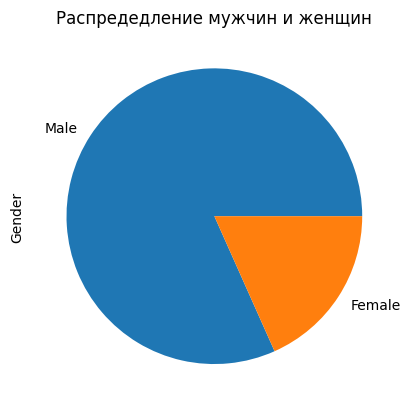

In [154]:
plt.title('Распредедление мужчин и женщин')
clean_df['Gender'].value_counts(normalize=True).plot.pie()
plt.show()

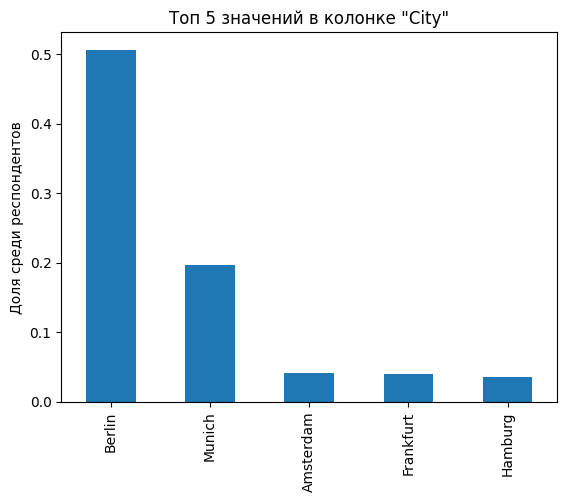

In [161]:
def plot_bar(column, top=5):
    plt.title(f'Топ {top} значений в колонке "{column}"')
    clean_df[column].value_counts(normalize=True).head(top).plot.bar()
    plt.ylabel('Доля среди респондентов')
    plt.show()  


plot_bar('City')

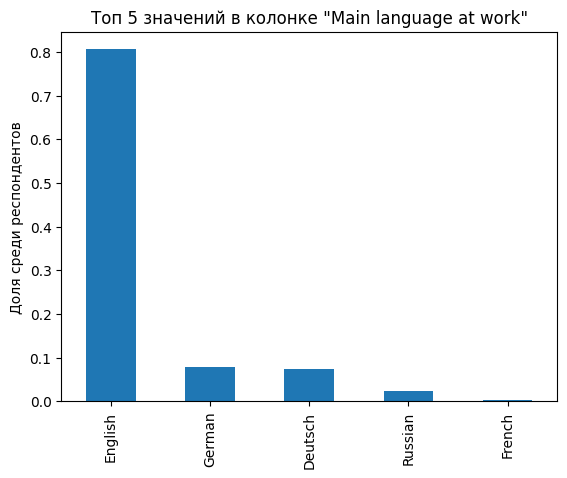

In [162]:
plot_bar('Main language at work')

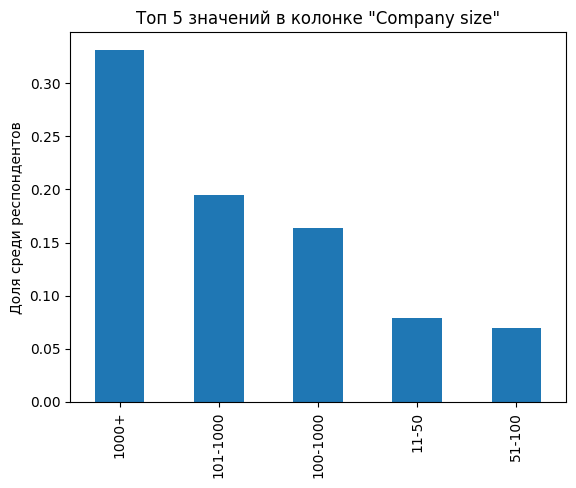

In [163]:
plot_bar('Company size')

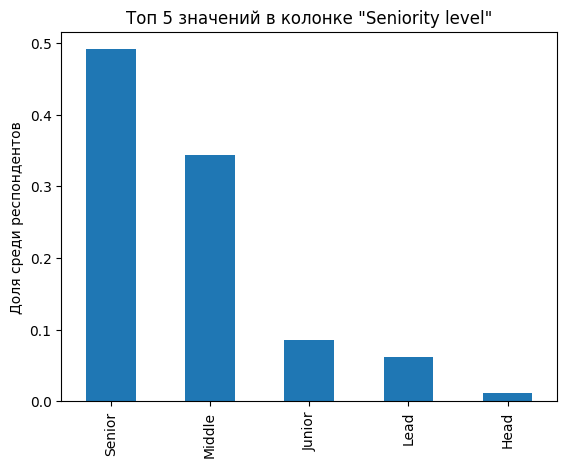

In [164]:
plot_bar('Seniority level')

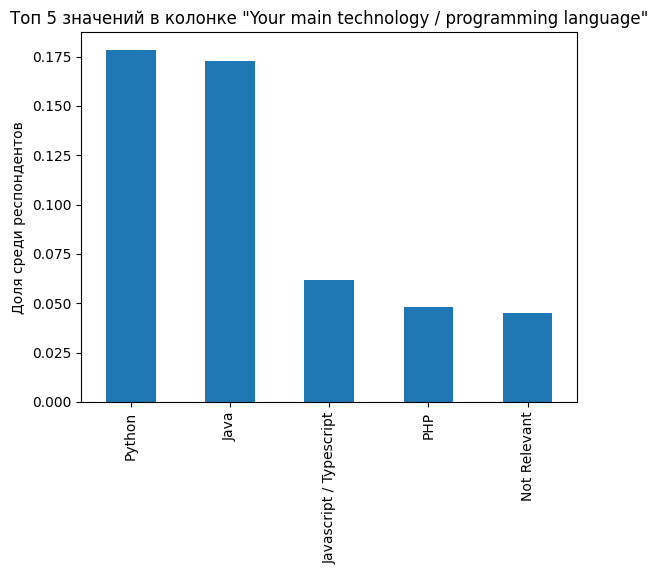

In [165]:
plot_bar('Your main technology / programming language')

# Кластерный анализ

In [176]:
def categorize_features(df, feature, uniq_treshold=10):
    df = df.copy()
    if df[feature].nunique() > uniq_treshold:
        relevant_vals = df[feature].value_counts().head(uniq_treshold).index
        mapping_dict = {name: name if name in relevant_vals else 'Other' for name in df[feature].unique()}
        df[f'{feature}_updated'] = df[feature].map(mapping_dict)
        return pd.get_dummies(df[f'{feature}_updated'], prefix=feature.lower())
    else:
        return pd.get_dummies(df[feature], prefix=feature.lower())


In [191]:
clean_df_for_clustering = clean_df.copy()

all_rel_columns = [*relevant_categorical_columns, *continues_columns]

for feature in clean_df_for_clustering.columns:
    if feature not in all_rel_columns:
        clean_df_for_clustering.drop(columns=[feature], inplace=True)

for feature in relevant_categorical_columns:
    res = categorize_features(clean_df, feature)
    clean_df_for_clustering = pd.concat([clean_df_for_clustering, res], axis=0)
    clean_df_for_clustering.drop(columns=[feature], inplace=True)
    
clean_df_for_clustering.fillna(0, inplace=True)
clean_df_for_clustering.head()

,Age,Number of home office days per month,Yearly salary,Years of experience total,gender_Female,gender_Male,city_Amsterdam,city_Berlin,city_Cologne,city_Düsseldorf,...,employment status_Founder,employment status_Full-time employee,"employment status_Full-time position, part-time position, & self-employed (freelancing, tutoring)",employment status_Intern,employment status_Part-time employee,employment status_Self-employed (freelancer),employment status_Werkstudent,employment status_Working Student,"employment status_full-time, but 32 hours per week (it was my request, I'm a student)",employment status_working student
0,33.0,4.0,64000.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29.0,4.0,55000.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,70000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,0.0,63000.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,0.0,66000.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=8)
clean_df_for_clustering['cluster'] = cluster_model.fit_predict(clean_df_for_clustering)
clean_df_for_clustering.head()

,Age,Number of home office days per month,Yearly salary,Years of experience total,gender_Female,gender_Male,city_Amsterdam,city_Berlin,city_Cologne,city_Düsseldorf,...,employment status_Full-time employee,"employment status_Full-time position, part-time position, & self-employed (freelancing, tutoring)",employment status_Intern,employment status_Part-time employee,employment status_Self-employed (freelancer),employment status_Werkstudent,employment status_Working Student,"employment status_full-time, but 32 hours per week (it was my request, I'm a student)",employment status_working student,cluster
0,33.0,4.0,64000.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,29.0,4.0,55000.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,70000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,30.0,0.0,63000.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,32.0,0.0,66000.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [204]:
# В результате разбили данные на 8 кластеров
clean_df_for_clustering['cluster'].value_counts()

1    24598
2      371
7      344
5      333
6      256
0      219
3      144
4       75
Name: cluster, dtype: int64

## Исследуем кластеры

In [212]:
results = clean_df_for_clustering.groupby('cluster').mean().T
results

Index(['Age', 'Number of home office days per month', 'Yearly salary',
       'Years of experience total', 'gender_Female', 'gender_Male',
       'city_Amsterdam', 'city_Berlin', 'city_Cologne', 'city_Düsseldorf',
       ...
       'employment status_Founder', 'employment status_Full-time employee',
       'employment status_Full-time position, part-time position, & self-employed (freelancing, tutoring)',
       'employment status_Intern', 'employment status_Part-time employee',
       'employment status_Self-employed (freelancer)',
       'employment status_Werkstudent', 'employment status_Working Student',
       'employment status_full-time, but 32 hours per week (it was my request, I'm a student)',
       'employment status_working student'],
      dtype='object', length=131)

In [211]:
results.to_excel('Результат кластеризации.xlsx')